------------------------------------------------------------------------------------------------------------------

## Data Description

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|

## Summary

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import cv2

%matplotlib inline
sns.set_style('darkgrid')
sns.set(font_scale=1.2)


from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
# from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
# from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.models import Sequential, save_model
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
# from tensorflow.keras.optimizers import Adam

#For ANN and DNN
import keras
from keras.models import save_model, load_model, Sequential
from keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from keras.optimizers import Adam, Adagrad, RMSprop, SGD
from keras.regularizers import l1,l2,l1_l2

#For Convolutional Neural Networks
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.callbacks import TensorBoard

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)
tf.random.set_seed(0)

## Image Exploration

### Use Pillow library and Numpy

In [ ]:
pic = Image.open('artificial-intelligence.jpg')

In [ ]:
pic

In [ ]:
pic_arr = np.asarray(pic)

In [ ]:
pic_arr

In [ ]:
pic_arr.shape

In [ ]:
pic_arr[:,:,0]

In [ ]:
plt.imshow(pic_arr[:,:,0]) #Red Channel

In [ ]:
im = plt.imread('artificial-intelligence.jpg')

In [ ]:
plt.imshow(im)
plt.show()

In [ ]:
im.shape

In [ ]:
R = im[:,:,0]
G = im[:,:,1]
B = im[:,:,2]

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,15))
ax1.imshow(R,cmap='gray')
ax2.imshow(G,cmap='gray')
ax3.imshow(B,cmap='gray')
plt.show()

In [ ]:
G2 = im.copy()

In [ ]:
G2[:,:,1] = 255

In [ ]:
plt.imshow(G2)  #Full Green Channel

### Use OpenCV

In [ ]:
img = cv2.imread('artificial-intelligence.jpg')

In [ ]:
imgraycv2 = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [ ]:
plt.imshow(imgraycv2, cmap='gray')

In [ ]:
fix_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [ ]:
plt.imshow(fix_img)

In [ ]:
fix_img.shape

In [ ]:
resizeimg = cv2.resize(fix_img,(400,400))

In [ ]:
plt.imshow(resizeimg)

In [ ]:
cv2.imwrite("small.jpg", fix_img)

### Blurring, Edge, Sharpening

In [ ]:
img = cv2.imread('artificial-intelligence.jpg')

In [ ]:
plt.imshow(img)

In [ ]:
imrgb = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

In [ ]:
plt.imshow(imrgb)

In [ ]:
#Gamma Correction : Practical Effect of Increasing Brightness
gamma = 2.0
result = np.power(imrgb,gamma)
plt.imshow(result)

In [ ]:
img = cv2.imread('artificial-intelligence.jpg')

In [ ]:
plt.imshow(img)

In [ ]:
blur = cv2.blur(img,ksize=(15,15))

In [ ]:
plt.imshow(blur)

### Gaussian Blur

In [ ]:
img = cv2.imread('artificial-intelligence.jpg')

In [ ]:
plt.imshow(img)

In [ ]:
gaussianblur = cv2.GaussianBlur(img,(5,5),2)

In [ ]:
plt.imshow(gaussianblur)

### Median Blur

In [ ]:
img = cv2.imread('artificial-intelligence.jpg')

In [ ]:
plt.imshow(img)

In [ ]:
median = cv2.medianBlur(img,3)

In [ ]:
plt.imshow(median)

### BiLateral Blur

In [ ]:
img = cv2.imread('artificial-intelligence.jpg')

In [ ]:
plt.imshow(img)

In [ ]:
bilateral = cv2.bilateralFilter(img,23,15,15)

In [ ]:
plt.imshow(bilateral)

## Data Exploration

In [2]:
covid100 = cv2.imread('train\\covid\\100.png')
covid100

array([[[255, 255, 255],
        [ 90,  90,  90],
        [  2,   2,   2],
        ...,
        [ 74,  74,  74],
        [ 63,  63,  63],
        [ 68,  68,  68]],

       [[255, 255, 255],
        [ 90,  90,  90],
        [  2,   2,   2],
        ...,
        [ 78,  78,  78],
        [ 66,  66,  66],
        [ 64,  64,  64]],

       [[181, 181, 181],
        [  0,   0,   0],
        [  3,   3,   3],
        ...,
        [ 72,  72,  72],
        [ 72,  72,  72],
        [ 68,  68,  68]],

       ...,

       [[216, 255, 255],
        [253, 250, 255],
        [255, 247, 255],
        ...,
        [252, 252, 252],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 89, 255, 254],
        [153, 255, 255],
        [223, 250, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [235, 235, 235]],

       [[ 19, 255, 241],
        [ 44, 255, 245],
        [ 95, 255, 252],
        ...,
        [255, 255, 255],
        [246, 246, 246],
        [195, 195, 195]]

In [3]:
covid100.shape

(130, 219, 3)

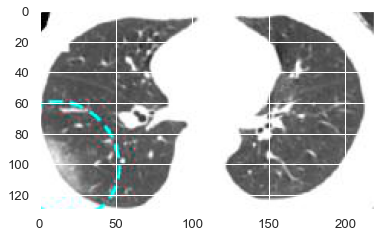

In [4]:
plt.imshow(covid100)
plt.show()

In [5]:
covid100.max()

255

In [6]:
ncovid10 = cv2.imread('train\\ncovid\\10.png')
ncovid10 = cv2.cvtColor(ncovid10,cv2.COLOR_BGR2RGB)

In [7]:
ncovid10.shape

(222, 352, 3)

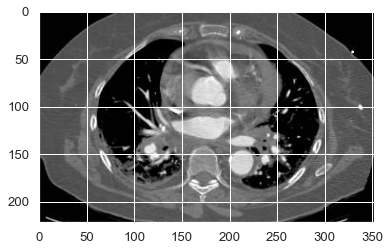

In [8]:
plt.imshow(ncovid10)
plt.show()

In [9]:
ncovid10.max()

255

## Convolutional Neural Networks for Image Classification

### Data Preprocessing

#### Preprocessing Training Set

In [10]:
train_datagen = ImageDataGenerator(rotation_range=30,  # rotate the image 30 degrees
                               width_shift_range=0.1,# Shift the pic width by a max of 10%
                               height_shift_range=0.1,# Shift the pic height by a max of 10%
                               rescale=1./255,# Rescale the image by normalizing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True,# All horizontal flipping
                               fill_mode= "nearest" # Fill in missing pixels with the nearest filled value
                                )

In [11]:
batch_size = 5

train_generator = train_datagen.flow_from_directory('train', target_size=(32,32), batch_size=batch_size,
                                                    class_mode='binary', color_mode='grayscale')

Found 558 images belonging to 2 classes.


In [12]:
len(train_generator)

112

In [13]:
train_generator.class_indices

{'covid': 0, 'ncovid': 1}

#### Preprocessing Test Set

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
batch_size = 5

validation_generator = test_datagen.flow_from_directory('test', target_size=(32,32), 
                                                        batch_size=batch_size,class_mode='binary',color_mode='grayscale' )

Found 140 images belonging to 2 classes.


In [16]:
len(validation_generator)

28

## CNN Model Creation

In [ ]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), input_shape=(100,100,1), 
                 activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

model.add(Dropout(0.4))

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

model.add(Dropout(0.4))

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))

model.add(Dropout(0.4))

model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])

### Model Training

In [ ]:
#steps_per_epoch = TotalTrainingSamples / TrainingBatchSize
#validation_steps = TotalvalidationSamples / ValidationBatchSize
#558 / 5
#140 / 5 

In [ ]:
# results = model.fit_generator(train_generator,epochs=10,verbose=1,steps_per_epoch=112,
#                    validation_data=validation_generator,validation_steps=25)

In [ ]:
results = model.fit(train_generator,epochs=10,verbose=1,steps_per_epoch=112,batch_size=5,
                   validation_data=validation_generator,validation_steps=25)

### Model Evaluation

In [ ]:
#evaluation = model.evaluate(X_test,y_test)

In [ ]:
model.metrics_names

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Training Accuracy and Validation Accuracy")
plt.xlabel("Epoch Number")
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Training and Validation Loss")
plt.xlabel("Epoch Number")
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

### Model Prediction

In [ ]:
train_generator.class_indices

In [ ]:
test_img = image.load_img('predict\\348.png', target_size=(100,100))

In [ ]:
test_img = image.img_to_array(test_img)

In [ ]:
test_img

In [ ]:
test_img.shape

In [ ]:
test_img_grey = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)

In [ ]:
test_img_grey.shape

In [ ]:
test_img_grey = np.expand_dims(test_img_grey,axis=0)

In [ ]:
test_img_grey.shape

In [ ]:
test_img_grey = test_img_grey/255

In [ ]:
model.predict_classes(test_img_grey)

In [ ]:
model.predict(test_img_grey)

### Save the Model

In [ ]:
model.save("covid.h5")

## Transfer Learning

### Use LeNet Model

In [17]:
lenet = Sequential()

lenet.add(Conv2D(filters=6,kernel_size=(5,5),activation='relu',input_shape=(32,32,1)))
lenet.add(AveragePooling2D())

lenet.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu'))
lenet.add(AveragePooling2D())

lenet.add(Flatten())

lenet.add(Dense(units=120, activation='relu'))

lenet.add(Dense(units=84, activation='relu'))

lenet.add(Dense(units=1,activation='sigmoid'))

In [18]:
lenet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [19]:
lenet.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])

In [20]:
results = lenet.fit(train_generator,epochs=25,verbose=1,steps_per_epoch=112,batch_size=5,
                   validation_data=validation_generator,validation_steps=25)

Epoch 1/25
112/112 [==============================] - 4s 33ms/step - loss: 0.6954 - accuracy: 0.5036 - val_loss: 0.6908 - val_accuracy: 0.5520
Epoch 2/25
112/112 [==============================] - 3s 31ms/step - loss: 0.6858 - accuracy: 0.5627 - val_loss: 0.6973 - val_accuracy: 0.4800
Epoch 3/25
112/112 [==============================] - 3s 30ms/step - loss: 0.6696 - accuracy: 0.5376 - val_loss: 0.7481 - val_accuracy: 0.4480
Epoch 4/25
112/112 [==============================] - 3s 30ms/step - loss: 0.6741 - accuracy: 0.5842 - val_loss: 0.7029 - val_accuracy: 0.4320
Epoch 5/25
112/112 [==============================] - 3s 30ms/step - loss: 0.6578 - accuracy: 0.6022 - val_loss: 0.7478 - val_accuracy: 0.5200
Epoch 6/25
112/112 [==============================] - 4s 33ms/step - loss: 0.6643 - accuracy: 0.6129 - val_loss: 0.7057 - val_accuracy: 0.4240
Epoch 7/25
112/112 [==============================] - 4s 33ms/step - loss: 0.6652 - accuracy: 0.5968 - val_loss: 0.6982 - val_accuracy: 0.4720

In [21]:
results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

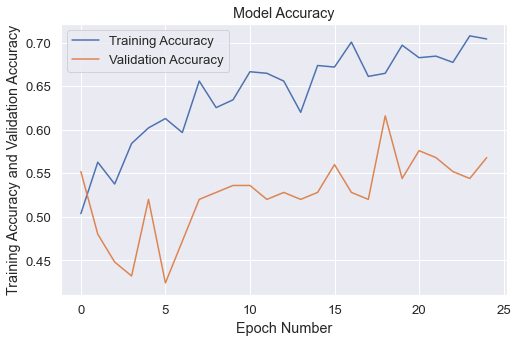

In [22]:
plt.figure(figsize=(8,5))
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Training Accuracy and Validation Accuracy")
plt.xlabel("Epoch Number")
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

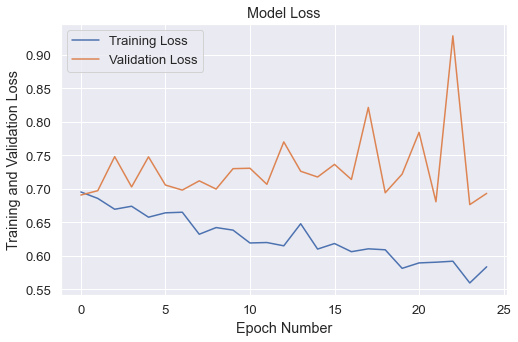

In [23]:
plt.figure(figsize=(8,5))
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Training and Validation Loss")
plt.xlabel("Epoch Number")
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [24]:
lenet.save("covidlenet.h5")